In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
inputDir = os.environ['INPUT_DIR']
outputDir = os.environ['OUTPUT_DIR']
os.listdir(inputDir)

['front-conference-room-motion.csv',
 'popularTimes.csv',
 'process_motion.ipynb',
 '.ipynb_checkpoints']

In [3]:
motionData = pd.read_csv(os.path.join(inputDir, 'front-conference-room-motion.csv'))

In [4]:
# Convert timestamp to my timezone.
motionData['Local Date'] = pd.to_datetime(motionData['Timestamp'], unit='ms', utc=True).dt.tz_convert('America/New_York')

# Create a new column that is the Day of Week and Time of Day for each entry e.g. Thursday at 14:00.
motionData['dayHour'] = motionData['Local Date'].dt.strftime('%A at %H')

# Only aggregating by motion, drop all other unneeded columns.
motionData = motionData.drop(columns=['illuminance', 'humidity', 'temperature', 'tamper', 'indoorX', 'indoorY', 'inUse', 'ultravioletIndex', 'battery', 'Timestamp'])

# Group and sum by the Day of Week / Time of Day column. Sort by 'motion' column.
result = motionData.groupby('dayHour').sum().sort_values('motion', ascending=False)

In [5]:
result.to_csv(os.path.join(outputDir, 'popularTimes.csv'))
result.head()

,motion
dayHour,
Thursday at 13,60.0
Tuesday at 10,57.0
Monday at 16,56.0
Thursday at 11,47.0
Monday at 14,45.0


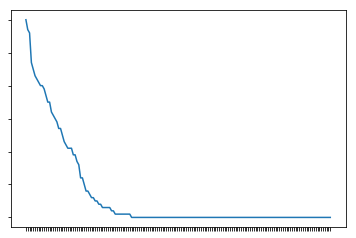

In [12]:
fig,ax = plt.subplots(1)
ax.plot(result)
# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.savefig(os.path.join(outputDir, 'popularTimes.png'), format='png', dpi=150)

<Figure size 432x288 with 0 Axes>